In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2014-01-31 to 2019-10-31
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   datum                          70 non-null     datetime64[ns]
 1   M01AB                          70 non-null     float64       
 2   M01AE                          70 non-null     float64       
 3   N02BA                          70 non-null     float64       
 4   N02BE                          70 non-null     float64       
 5   N05B                           70 non-null     float64       
 6   N05C                           70 non-null     float64       
 7   R03                            70 non-null     float64       
 8   R06                            70 non-null     float64       
 9   year                           70 non-null     int64         
 10  month                          70 non-null     int64         
 11  d

In [43]:
df=pd.read_csv('salesmonthly.csv')

In [45]:
df['datum'] = pd.to_datetime(df['datum'], format= '%Y-%m-%d')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [46]:
import datetime as dt
df['year'] = df['datum'].dt.year
df['month'] = df['datum'].dt.month
df['day'] = df['datum'].dt.day


In [47]:
df.set_index(df['datum'], inplace= True)

In [48]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,
2014-01-31,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,2014,1,31
2014-02-28,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,2014,2,28
2014-03-31,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,2014,3,31
2014-04-30,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,2014,4,30
2014-05-31,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,2014,5,31


In [49]:
def plot_line_curve(series):
    plt.figure(figsize= (15,5))
    series.plot(kind= 'line')
    plt.title(f'Monthly Sales of Drug : {col}')
    plt.show()
    

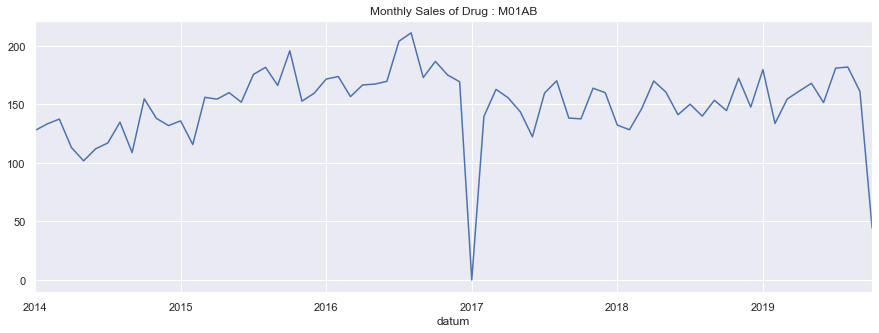

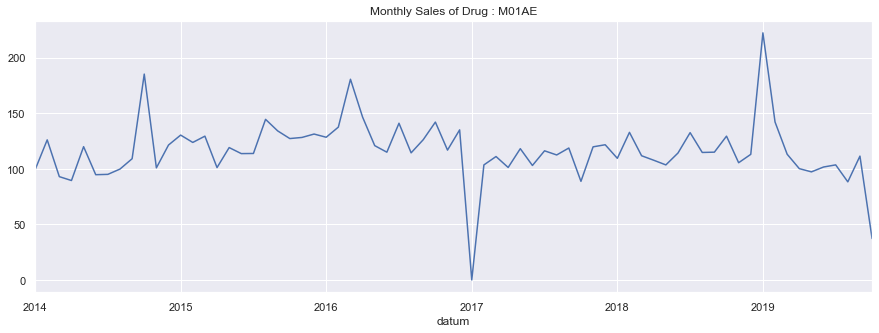

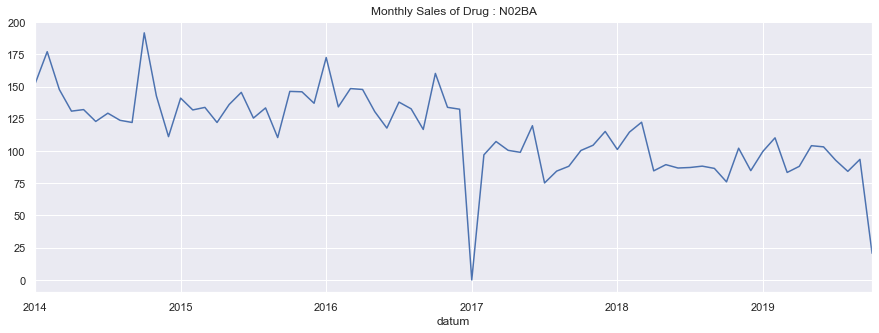

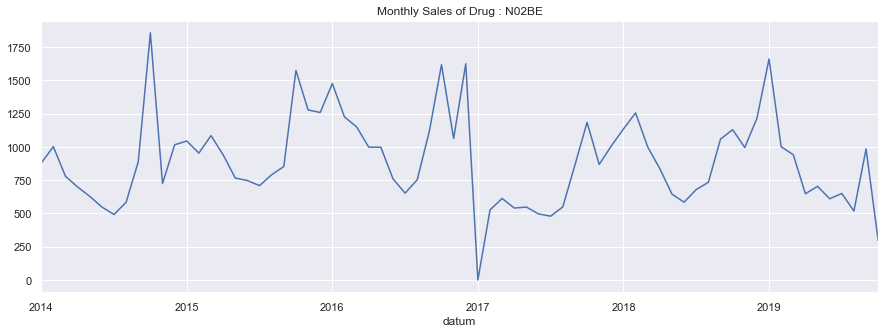

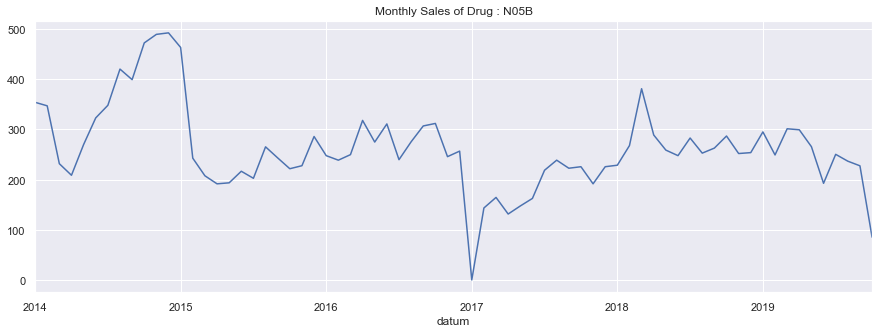

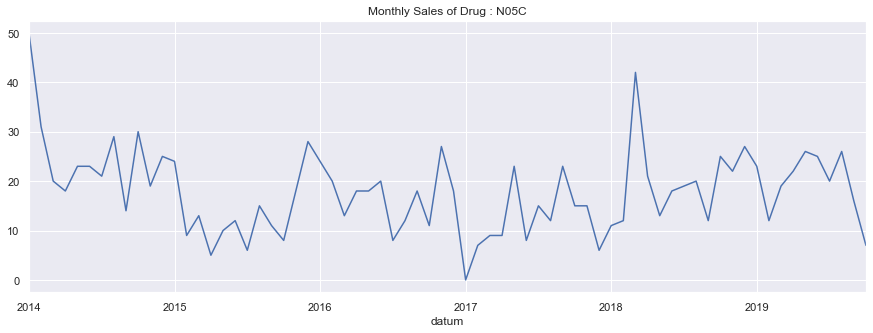

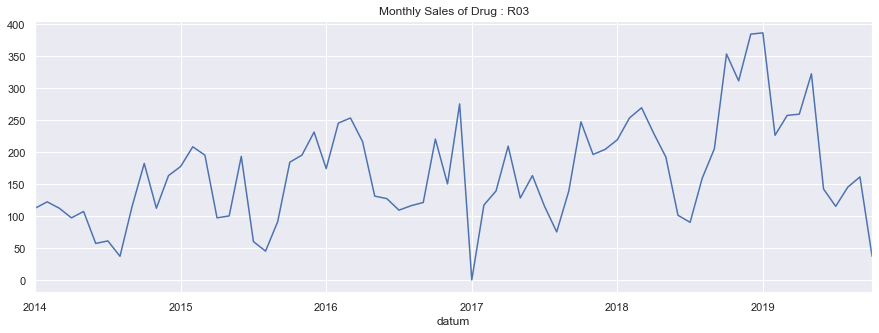

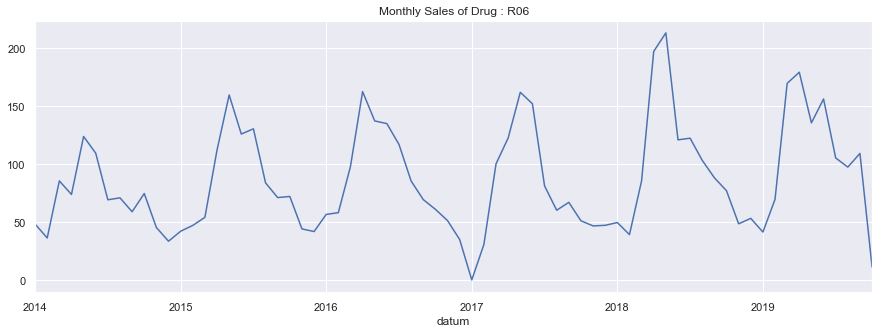

In [51]:
for col in df.columns[1:9]:
    plot_line_curve(df[col])

In [52]:
from statsmodels.tsa.stattools import adfuller

In [54]:
test_result=adfuller(df['R06'])

In [55]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [56]:
adfuller_test(df['R06'])

ADF Test Statistic : -1.4336731485915035
p-value : 0.5660306144602514
#Lags Used : 10
Number of Observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [57]:
df['R06 First Difference'] = df['R06'] - df['R06'].shift(1)

In [58]:
df['R06'].shift(1)


datum
2014-01-31       NaN
2014-02-28     48.20
2014-03-31     36.20
2014-04-30     85.40
2014-05-31     73.70
               ...  
2019-06-30    135.40
2019-07-31    156.04
2019-08-31    105.20
2019-09-30     97.30
2019-10-31    109.10
Name: R06, Length: 70, dtype: float64

In [59]:
df['R06 Seasonal First Difference']=df['R06']-df['R06'].shift(12)

In [61]:
df.head(14)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day,R06 First Difference,R06 Seasonal First Difference
datum,,,,,,,,,,,,,,
2014-01-31,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.00,48.2,2014,1,31,NaN,NaN
2014-02-28,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.00,36.2,2014,2,28,-12.0,NaN
2014-03-31,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.00,85.4,2014,3,31,49.2,NaN
2014-04-30,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.00,73.7,2014,4,30,-11.7,NaN
2014-05-31,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.00,123.7,2014,5,31,50.0,NaN
2014-06-30,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.00,109.3,2014,6,30,-14.4,NaN
2014-07-31,2014-07-31,117.06,95.010,129.300,491.900,348.0,21.0,61.00,69.1,2014,7,31,-40.2,NaN
2014-08-31,2014-08-31,134.79,99.780,123.800,583.850,420.0,29.0,37.00,70.8,2014,8,31,1.7,NaN
2014-09-30,2014-09-30,108.78,109.094,122.100,887.820,399.0,14.0,115.00,58.8,2014,9,30,-12.0,NaN


In [63]:
adfuller_test(df['R06 Seasonal First Difference'].dropna())

ADF Test Statistic : -2.93080871710509
p-value : 0.04188087462458026
#Lags Used : 11
Number of Observations Used : 46
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='datum'>

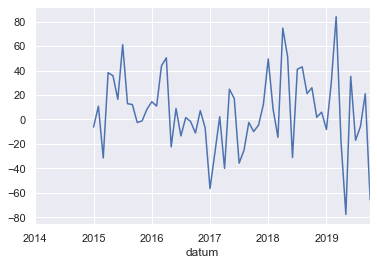

In [64]:
df['R06 Seasonal First Difference'].plot()


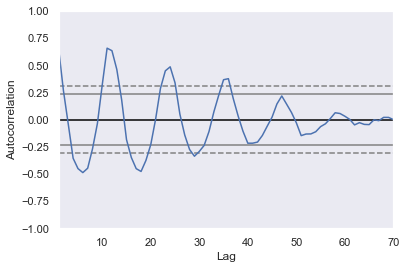

In [66]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['R06'])
plt.show()

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


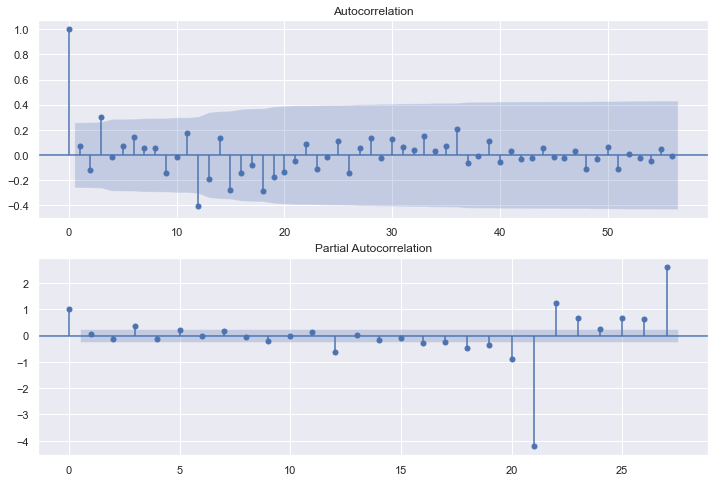

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['R06 Seasonal First Difference'].iloc[13:],lags=56,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['R06 Seasonal First Difference'].iloc[13:],lags=27,ax=ax2)

In [80]:
model=sm.tsa.statespace.SARIMAX(df['R06'],order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='datum'>

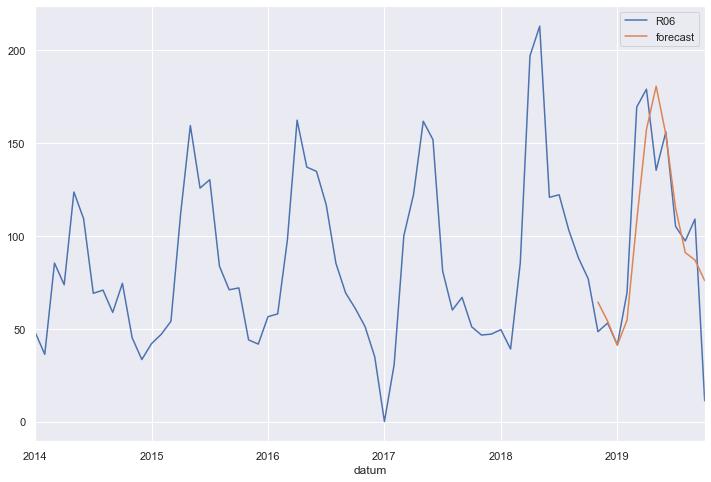

In [83]:
df['forecast']=results.predict(start=58,end=70,dynamic=True)
df[['R06','forecast']].plot(figsize=(12,8))